<a href="https://colab.research.google.com/github/noahgift/kaggle-hackery/blob/master/Red_Wine_Quality_kaggle_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Load Recipe

## Mount GDrive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


### list in python

In [0]:
import os;os.listdir("/content/gdrive/My Drive/awsml")

['kaggle.json', 'credentials', 'config']

### list in bash

In [0]:
!ls -l /content/gdrive/My\ Drive/awsml

total 2
-rw------- 1 root root  43 Nov 22 00:05 config
-rw------- 1 root root 117 Nov 22 00:01 credentials
-rw------- 1 root root  64 Nov 21 22:24 kaggle.json


## Wire up Kaggle

In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
!cp /content/gdrive/My\ Drive/awsml/kaggle.json ~/.kaggle/kaggle.json

## Get Kaggle UCIML Red Wine Quality Data

In [0]:
!kaggle datasets download -d uciml/red-wine-quality-cortez-et-al-2009
!ls -l /content
!unzip /content/red-wine-quality-cortez-et-al-2009.zip

red-wine-quality-cortez-et-al-2009.zip: Skipping, found more recently modified local copy (use --force to force download)
total 36
drwx------ 4 root root  4096 Jan 19 03:14 gdrive
-rw-r--r-- 1 root root 26136 Jan 19 03:15 red-wine-quality-cortez-et-al-2009.zip
drwxr-xr-x 1 root root  4096 Jan  8 17:15 sample_data
Archive:  /content/red-wine-quality-cortez-et-al-2009.zip
  inflating: winequality-red.csv     


### Import Libraries

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load into Pandas

In [0]:
import pandas as pd
df = pd.read_csv("/content/winequality-red.csv")
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


### Visualize Quality

Reference kernel:  https://www.kaggle.com/muammerhuseyinoglu/prediction-of-wine-quality


In [0]:
quality = df["quality"].values
category = []
for num in quality:
    if num<5:
        category.append("Bad")
    elif num>6:
        category.append("Good")
    else:
        category.append("Mid")

In [0]:
#Create new data
category = pd.DataFrame(data=category, columns=["category"])
data = pd.concat([df,category],axis=1)
data.drop(columns="quality",axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Mid     1319
Good     217
Bad       63
Name: category, dtype: int64

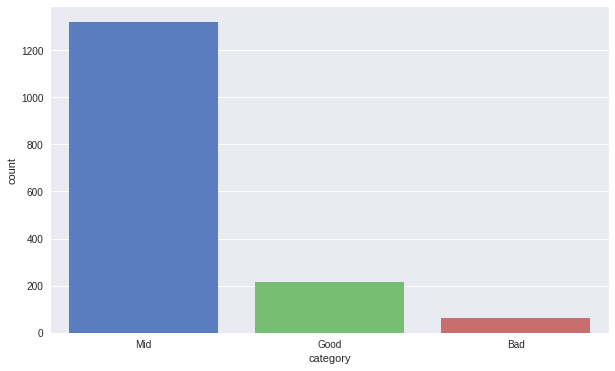

In [0]:
plt.figure(figsize=(10,6))
sns.countplot(data["category"],palette="muted")
data["category"].value_counts()